<a href="https://colab.research.google.com/github/divyaah/ci_gender_age_detection/blob/main/A1_4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import optimizers


In [2]:
batch_size = 128
num_classes = 10
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  #https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/ to know about image_data_format and what is "channelS_first"
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #normalizing
x_test /= 255 #normalizing
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


<h3>Category 1: Kernel_size (3,3) without adding dropout and batch normalization </h3> 

2 Hidden Layers

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 10)                309770    
                                                                 
Total params: 420,874
Trainable params: 420,874
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 28s 35ms/step - loss: 2.2672 - accuracy: 0.2558 - val_loss: 2.2180 - val_accuracy: 0.4143
Epoch 2/10
469/469 [==============================] - 16s 33ms/step - loss: 2.1084 - accuracy: 0.5343 - val_loss: 1.9195 - val_accuracy: 0.6695
Epoch 3/10
469/469 [==============================] - 16s 33ms/step - loss: 1.4902 - accuracy: 0.7340 - val_loss: 0.9744 - val_accuracy: 0.7941
Epoch 4/10
469/469 [==============================] - 16s 33ms/step - loss: 0.7546 - accuracy: 0.8099 - val_loss: 0.5860 - val_accuracy: 0.8415
Epoch 5/10
469/469 [==============================] - 16s 33ms/step - loss: 0.5561 - accuracy: 0.8423 - val_loss: 0.4906 - val_accuracy: 0.8613
Epoch 6/10
469/469 [==============================] - 16s 34ms/step - loss: 0.4910 - accuracy: 0.8592 - val_loss: 0.4479 - val_accuracy: 0.8735
Epoch 7/10
469/469 [==============================] - 16s 33ms/step - loss: 0.4566 - accuracy: 0.8683 - val_loss: 0.4219 - val_accuracy:

Test score: 0.37835338711738586
Test accuracy: 0.8914999961853027


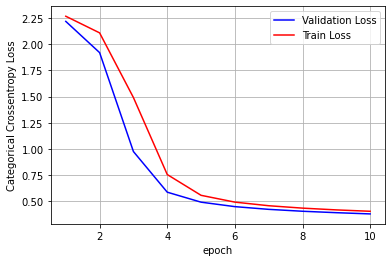

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3 Hidden Layers

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                128010    
                                                                 
Total params: 257,578
Trainable params: 257,578
Non-tr

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 19s 39ms/step - loss: 0.1528 - accuracy: 0.9542 - val_loss: 0.0466 - val_accuracy: 0.9852
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0353 - val_accuracy: 0.9880
Epoch 3/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0395 - val_accuracy: 0.9866
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0463 - val_accuracy: 0.9859
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0511 - val_accuracy:

Test score: 0.039502378553152084
Test accuracy: 0.9890999794006348


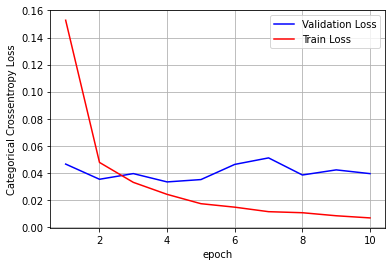

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>Category 2: Kernel_size (5,5) , max_pooling with adding dropout and batch normalization </h3> 

2Hidden Layer

In [11]:
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 10, 10, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 6, 6, 64)         

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 3.2237 - accuracy: 0.1546 - val_loss: 2.3689 - val_accuracy: 0.2276
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 2.6677 - accuracy: 0.2430 - val_loss: 1.6559 - val_accuracy: 0.4521
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 2.2987 - accuracy: 0.3171 - val_loss: 1.3867 - val_accuracy: 0.5333
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 2.0111 - accuracy: 0.3845 - val_loss: 1.1991 - val_accuracy: 0.6008
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 1.7955 - accuracy: 0.4378 - val_loss: 1.0543 - val_accuracy: 0.6533
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 1.6351 - accuracy: 0.4829 - val_loss: 0.9393 - val_accuracy: 0.6971
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 1.4940 - accuracy: 0.5209 - val_loss: 0.8459 - val_accuracy: 0.735

Test score: 0.6526992917060852
Test accuracy: 0.8090000152587891


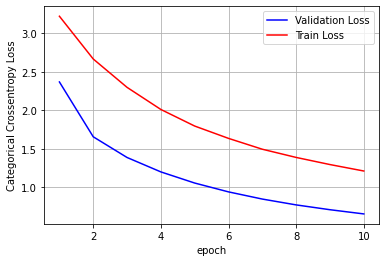

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>Category 3: Kernel_size (7,7),max_pooling, padding = "valid" with adding dropout and batch normalization </h3> 

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7),
                 padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 22, 22, 32)        1600      
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       200832    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2, 64)         

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.1801 - accuracy: 0.9471 - val_loss: 0.0824 - val_accuracy: 0.9857
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0651 - accuracy: 0.9816 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0264 - val_accuracy: 0.9920
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.0235 - val_accuracy: 0.9924
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0218 - val_accuracy: 0.9926
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0205 - val_accuracy: 0.9940
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0213 - val_accuracy:

Test score: 0.022158145904541016
Test accuracy: 0.992900013923645


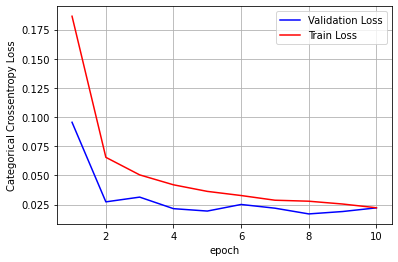

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)